In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [21]:
def Line_mit_standardab(df,x,y,xLabel,yLabel,title): 
    fig = go.Figure(data=go.Scatter(
        x=x,
        y=y,
        error_y=dict(
            type='data',
            array=(df.max(axis=1)- df.mean(axis=1)),# iteration über rows (0 iteriert über columns)
            color='purple',
            visible=True),
        ))
    fig.update_layout(title=title)
    fig.update_xaxes(tickangle=45, title_text=xLabel)
    fig.update_yaxes(title_text=yLabel)
    fig.show()

def boxplot(df, variable, labels, show_y_label, width = None, medianprops=None):
    plt.boxplot(df[variable],labels=labels, widths=width, medianprops=medianprops)
    axes = plt.gca()
    #axes.set_ylim([-1,25])
    if (show_y_label):
            plt.ylabel(variable)

def barplot(df, xachse, yachse, color=None, text = None,labeldict=None):     
    fig = px.bar(df, x=xachse, y=yachse, color=color,text=text, height=700,labels=labeldict)
    fig.update_traces(marker_line_color='black')
    fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
    fig.show()

def bar_mit_facet(df, xachse, yachse, reihe,color=None, text = None):
    fig = px.bar(df, x=xachse, y=yachse, color=color,text=text,height=700, 
             labels=dict(Preis = "Preis [€]",Anzahl_Tomaten='Anzahl'),facet_row=(reihe) )
    fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
    fig.show()
    
def bar_mit_std(list_x_values, list_y_values, list_std,tick_label=None, y_label=None, x_label=None):
    errorbars=np.array([np.zeros(len(list_std)), list_std])
    plt.bar(x=list_x_values, height=list_y_values,width=0.3,color='lightgray',
             edgecolor='black',tick_label=tick_label,yerr=errorbars,capsize=4)
    plt.ylabel(y_label)
    plt.xlabel(x_label)    

In [4]:
pd.set_option('display.max_columns', 500)
daten = pd.read_csv('student-mat.csv',sep=';')
daten

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [5]:
daten.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
daten.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'Medu'),
 Text(2.5, 0, 'Fedu'),
 Text(3.5, 0, 'traveltime'),
 Text(4.5, 0, 'studytime'),
 Text(5.5, 0, 'failures'),
 Text(6.5, 0, 'famrel'),
 Text(7.5, 0, 'freetime'),
 Text(8.5, 0, 'goout'),
 Text(9.5, 0, 'Dalc'),
 Text(10.5, 0, 'Walc'),
 Text(11.5, 0, 'health'),
 Text(12.5, 0, 'absences'),
 Text(13.5, 0, 'G1'),
 Text(14.5, 0, 'G2'),
 Text(15.5, 0, 'G3')]

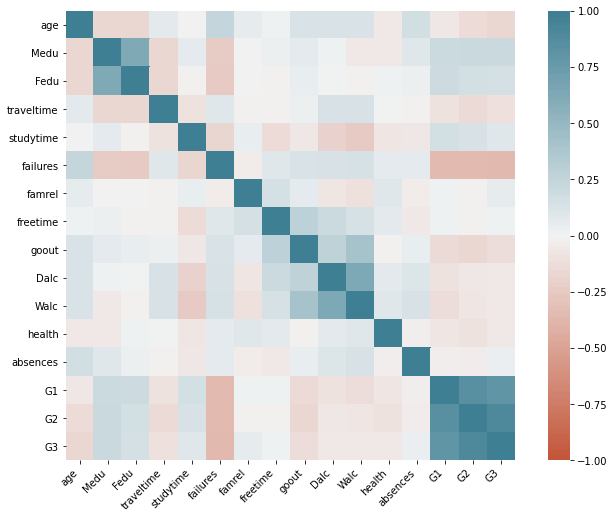

In [7]:
#import mylib

a4_dims = (11.7, 8.27)
#df = mylib.load_data()
fig, ax = plt.subplots(figsize=a4_dims)
corr = daten.corr()
ax = sns.heatmap(corr,ax=ax,  
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [8]:
daten['sexBinary'] = np.where(daten.sex=='F',0,1)

In [9]:
daten['addressBinary'] = np.where(daten.address=='U',1,0)

In [10]:
daten['famsizeBinary'] = np.where(daten.famsize=='GT3',1,0)
daten['PstatusBinary'] = np.where(daten.Pstatus=='T',1,0)
daten['schoolsupBinary'] = np.where(daten.schoolsup=='yes',1,0)
daten['famsupBinary'] = np.where(daten.famsup=='yes',1,0)
daten['paidBinary'] = np.where(daten.paid=='yes',1,0)
daten['activitesBinary'] = np.where(daten.activities=='yes',1,0)
daten['nurseryBinary'] = np.where(daten.nursery=='yes',1,0)
daten['higherBinary'] = np.where(daten.higher=='yes',1,0)
daten['internetBinary'] = np.where(daten.internet=='yes',1,0)
daten['romaticBinary'] = np.where(daten.romantic=='yes',1,0)

In [11]:
daten

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sexBinary,addressBinary,famsizeBinary,PstatusBinary,schoolsupBinary,famsupBinary,paidBinary,activitesBinary,nurseryBinary,higherBinary,internetBinary,romaticBinary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,1,1,0,1,0,0,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,1,1,1,0,1,0,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,1,0,1,1,0,1,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,1,1,1,0,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,1,1,1,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,0,0,0,1,1,0,1,1,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,0,1,0,0,0,0,0,1,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,0,1,1,0,0,0,0,0,1,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,0,0,1,0,0,0,0,0,1,1,0


In [12]:
x_values=[14,15,16,17,18,19,20,21,22]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['age']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['age']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

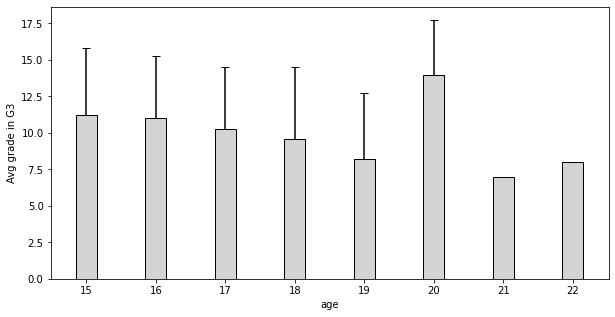

In [13]:
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='age')

In [14]:
a = np.corrcoef(daten.G3,daten.addressBinary)
a

array([[1.        , 0.10575606],
       [0.10575606, 1.        ]])

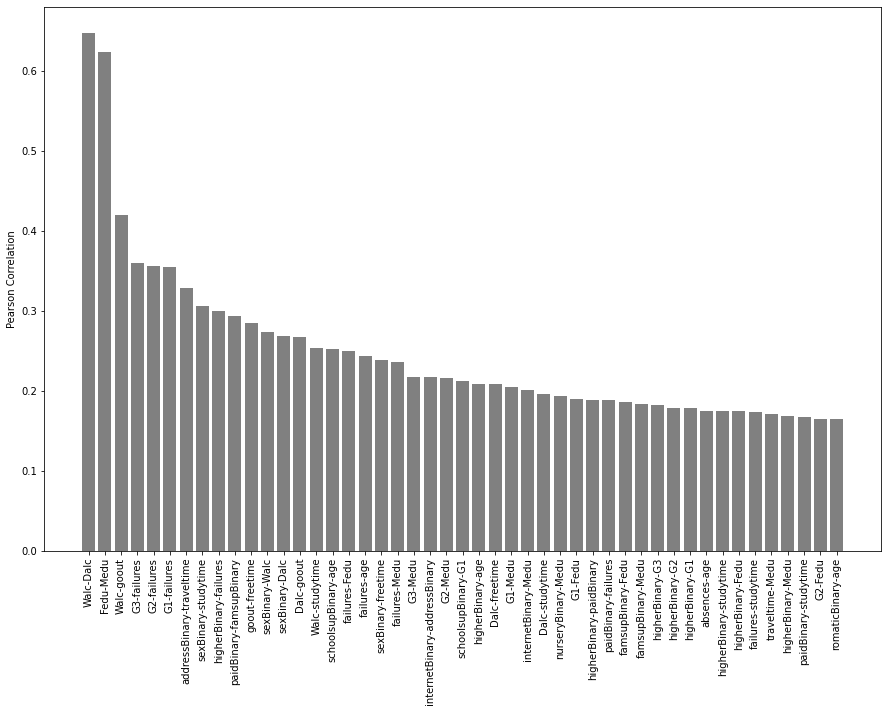

In [15]:
coors=[];
names=[]
correlations=[]
for var in daten.dtypes.items():
    if var[1].name=="int64":
        
        for othervar in daten.dtypes.items():
            if (var[0]==othervar[0]):
                break
            if ((othervar[1].name=="int64") ):        
                
                correlation=daten[var[0]].corr(daten[othervar[0]])
                #print(var[0],othervar[0],"correl:",correlation)
                names.append(var[0]+"-"+othervar[0])
                coors.append(correlation)
                correlations.append([abs(correlation),correlation,var[0]+"-"+othervar[0]])
                #add name and coors

correlations.sort(reverse=True)
heights=[]
labels=[]
for i in range(3,50):
    correlation=correlations[i]
    heights.append(correlation[0])
    labels.append(correlation[2])

figure,axis=plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
axis.bar(x=np.arange(len(heights)),height=heights,tick_label=labels,color="gray")
axis.set_ylabel("Pearson Correlation");

In [16]:
labels

['Walc-Dalc',
 'Fedu-Medu',
 'Walc-goout',
 'G3-failures',
 'G2-failures',
 'G1-failures',
 'addressBinary-traveltime',
 'sexBinary-studytime',
 'higherBinary-failures',
 'paidBinary-famsupBinary',
 'goout-freetime',
 'sexBinary-Walc',
 'sexBinary-Dalc',
 'Dalc-goout',
 'Walc-studytime',
 'schoolsupBinary-age',
 'failures-Fedu',
 'failures-age',
 'sexBinary-freetime',
 'failures-Medu',
 'G3-Medu',
 'internetBinary-addressBinary',
 'G2-Medu',
 'schoolsupBinary-G1',
 'higherBinary-age',
 'Dalc-freetime',
 'G1-Medu',
 'internetBinary-Medu',
 'Dalc-studytime',
 'nurseryBinary-Medu',
 'G1-Fedu',
 'higherBinary-paidBinary',
 'paidBinary-failures',
 'famsupBinary-Fedu',
 'famsupBinary-Medu',
 'higherBinary-G3',
 'higherBinary-G2',
 'higherBinary-G1',
 'absences-age',
 'higherBinary-studytime',
 'higherBinary-Fedu',
 'failures-studytime',
 'traveltime-Medu',
 'higherBinary-Medu',
 'paidBinary-studytime',
 'G2-Fedu',
 'romaticBinary-age']

In [17]:
datencorr = daten.corr().reset_index()
datencorr['G3'] = abs(datencorr.G3)
datencorr = datencorr.sort_values('G3',ascending=False)
datencorr

,index,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sexBinary,addressBinary,famsizeBinary,PstatusBinary,schoolsupBinary,famsupBinary,paidBinary,activitesBinary,nurseryBinary,higherBinary,internetBinary,romaticBinary
15,G3,-0.161579,0.217147,0.152457,-0.117142,0.097820,-0.360415,0.051363,0.011307,-0.132791,-0.054660,-0.051939,-0.061335,0.034247,0.801468,0.904868,1.000000,0.103456,0.105756,-0.081407,-0.058009,-0.082788,-0.039157,0.101996,0.016100,0.051568,0.182465,0.098483,-0.129970
14,G2,-0.143474,0.215527,0.164893,-0.153198,0.135880,-0.355896,-0.018281,-0.013777,-0.162250,-0.064120,-0.084927,-0.097720,-0.031777,0.852118,1.000000,0.904868,0.091099,0.126037,-0.081223,-0.041382,-0.117385,-0.059166,0.105198,0.050552,0.068146,0.179129,0.119439,-0.111774
13,G1,-0.064081,0.205341,0.190270,-0.093040,0.160612,-0.354718,0.022168,0.012613,-0.149104,-0.094159,-0.126179,-0.073172,-0.031003,1.000000,0.852118,0.801468,0.091839,0.069704,-0.071445,-0.016868,-0.212607,-0.084569,0.039079,0.057010,0.069263,0.178264,0.071619,-0.037188
5,failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,0.360415,0.044436,-0.078578,0.015769,-0.003339,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137
1,Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.078228,0.138804,0.043068,-0.123565,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681
25,higherBinary,-0.209081,0.168845,0.174566,-0.083508,0.175081,-0.300316,0.024319,-0.061244,-0.039700,-0.069828,-0.100340,-0.015895,-0.056085,0.178264,0.179129,0.182465,-0.151056,0.042854,0.005806,-0.040735,0.054486,0.100815,0.189214,0.096484,0.054303,1.000000,0.020374,-0.105664
0,age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,0.161579,-0.028606,-0.146722,-0.037847,0.029598,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669
2,Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.034878,0.072178,0.058879,-0.088730,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602
8,goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,0.132791,0.075897,0.068835,-0.023064,0.003459,-0.037698,-0.015631,0.010493,0.046088,0.004612,-0.039700,0.074370,0.007870
27,romaticBinary,0.164669,0.039681,0.015602,0.021962,0.053285,0.093137,-0.063816,-0.011182,0.007870,0.015121,-0.010141,0.026342,0.153384,-0.037188,-0.111774,0.129970,-0.102023,0.005257,-0.034395,-0.040451,-0.080716,0.012440,0.005536,0.019651,0.027495,-0.105664,0.087122,1.000000


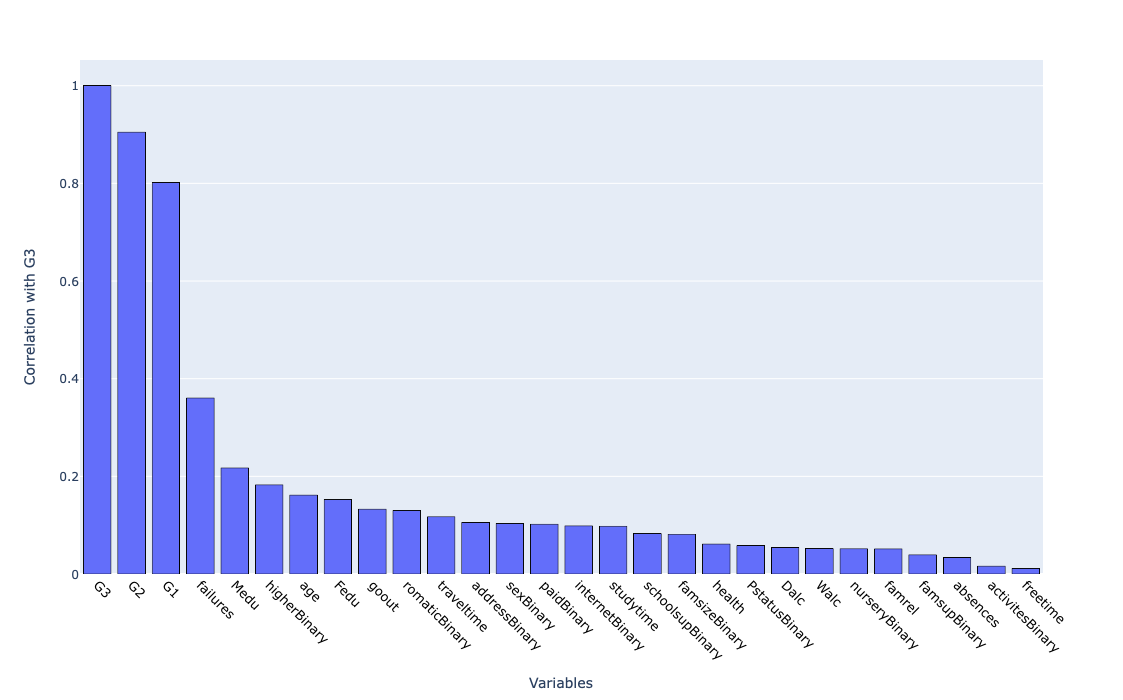

In [25]:
barplot(datencorr,'index','G3',labeldict=dict(G3='Correlation with G3',index = 'Variables'))

In [67]:
x_values=['U','R']
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['address']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['address']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

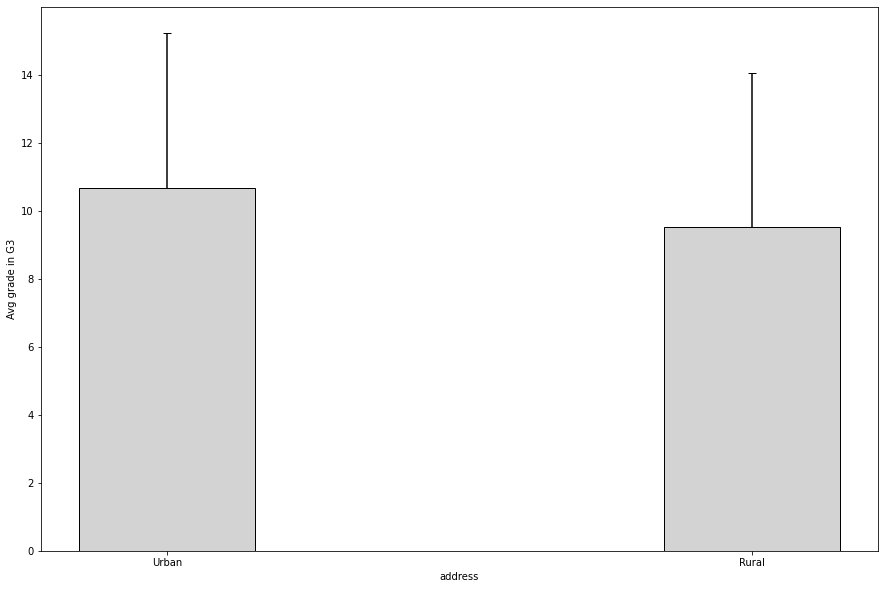

In [72]:
figure,axes=plt.subplots(figsize=(15,10))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='address',tick_label=['Urban','Rural'])

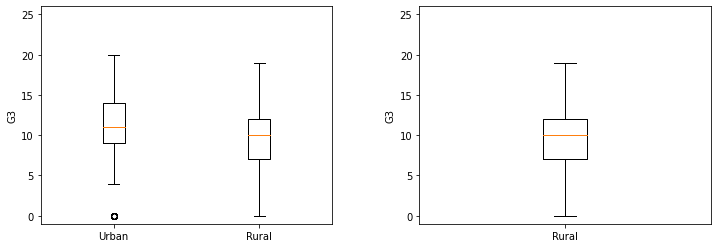

In [80]:
figure,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4));
figure.subplots_adjust(wspace = 0.3)#more width between the plots

def showBox(frames,labels,ylabel,aAxis,aShowYLabel,x_label=None):
    aAxis.boxplot(frames,labels=labels)
    aAxis.set_ylim(-1,26)
    aAxis.set_xlabel(x_label)
    #print("mediane:",abw_häufig[aVariableName].median(),abw_selten[aVariableName].median());
    #aAxis.set_xlabel(aVariableName+" ["+aUnit+"]")
    if (aShowYLabel):
        aAxis.set_ylabel(ylabel)
        

datenUrb = daten[daten['address']=='U']
datenRur = daten[daten['address']=='R']
showBox([datenUrb.G3,datenRur.G3],['Urban','Rural'],'G3',axes[0],True)
showBox([datenRur.G3],['Rural'],'G3',axes[1],True)

#showBox(abw["Work load Average/day "].name,"[h]",axes[2],True)

(0.0, 1.0)

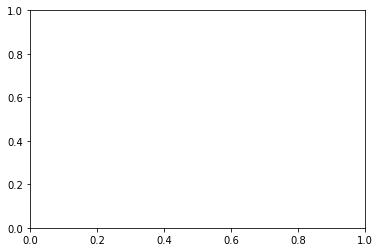

In [31]:
plt.ylim()

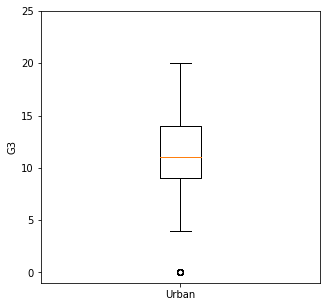

In [118]:
figure,axes=plt.subplots(figsize=(5,5))
datenUrb = daten[daten['address']=='U']
boxplot(datenUrb,'G3',['Urban'],True)

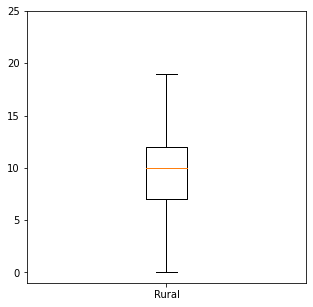

In [119]:
figure,axes=plt.subplots(figsize=(5,5))
datenUrb = daten[daten['address']=='R']
boxplot(datenUrb,'G3',['Rural'],False)

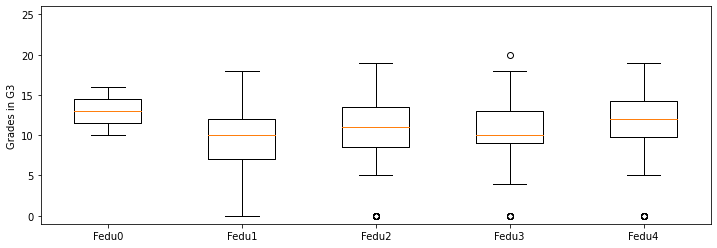

In [64]:
figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,4));
figure.subplots_adjust(wspace = 0.3)

datenFedu0 = daten[daten['Fedu']==0]
datenFedu1 = daten[daten['Fedu']==1]
datenFedu2 = daten[daten['Fedu']==2]
datenFedu3 = daten[daten['Fedu']==3]
datenFedu4 = daten[daten['Fedu']==4]

showBox([datenFedu0.G3,datenFedu1.G3,datenFedu2.G3,datenFedu3.G3,datenFedu4.G3],['Fedu0','Fedu1','Fedu2','Fedu3','Fedu4'],'Grades in G3',axes,True)

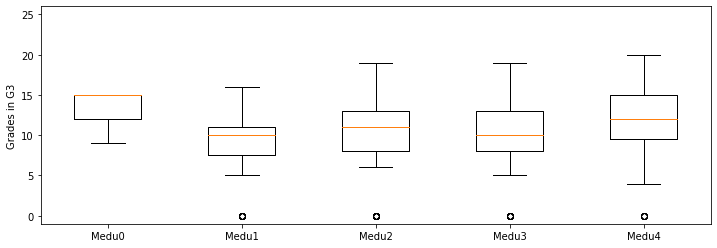

In [71]:
figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,4));
figure.subplots_adjust(wspace = 0.3)

datenMedu0 = daten[daten['Medu']==0]
datenMedu1 = daten[daten['Medu']==1]
datenMedu2 = daten[daten['Medu']==2]
datenMedu3 = daten[daten['Medu']==3]
datenMedu4 = daten[daten['Medu']==4]

showBox([datenMedu0.G3,datenMedu1.G3,datenMedu2.G3,datenMedu3.G3,datenMedu4.G3],['Medu0','Medu1','Medu2','Medu3','Medu4'],'Grades in G3',axes,True)

In [67]:
x_values=[0,1,2,3,4]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Fedu']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Fedu']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

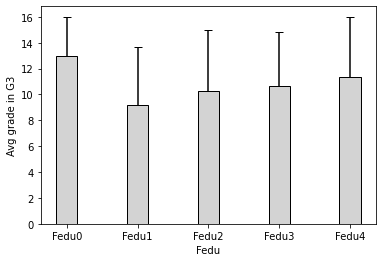

In [68]:
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='Fedu',tick_label=['Fedu0','Fedu1','Fedu2','Fedu3','Fedu4'])

In [69]:
x_values=[0,1,2,3,4]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Medu']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Medu']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

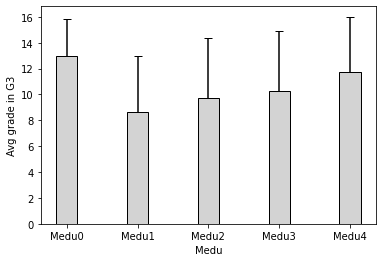

In [70]:
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='Medu',tick_label=['Medu0','Medu1','Medu2','Medu3','Medu4'])

In [115]:
TravelTime=[1,2,3,4]
AvgGrade=[]
listeSTD=[]
for i in TravelTime:
    temp = daten[daten['traveltime']==i]
    m = temp['G3'].mean()
    AvgGrade.append(m)
    
for i in TravelTime:
    temp = daten[daten['traveltime']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

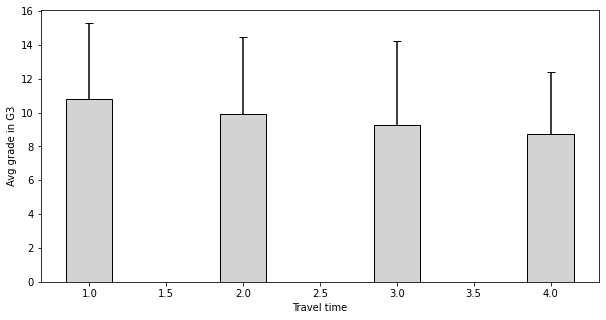

In [117]:
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(TravelTime,AvgGrade,listeSTD,y_label='Avg grade in G3',x_label='Travel time')

In [ ]:
TravelTime=[1,2,3,4]
AvgGrade=[]
listeSTD=[]
for i in TravelTime:
    temp = daten[daten['traveltime']==i]
    m = temp['G3'].mean()
    AvgGrade.append(m)
    
for i in TravelTime:
    temp = daten[daten['traveltime']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

In [72]:
x_values=[0,1]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['schoolsupBinary']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['schoolsupBinary']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

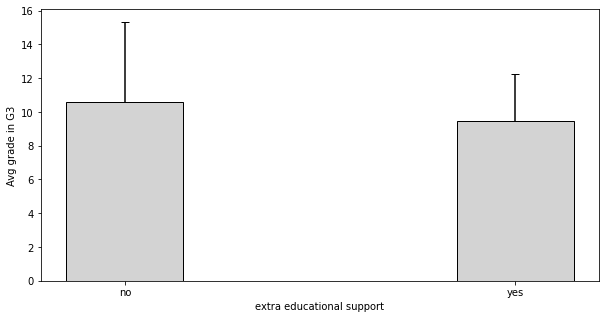

In [73]:
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='extra educational support',tick_label=['no','yes'])

In [74]:
x_values=[0,1]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['famsupBinary']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['famsupBinary']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

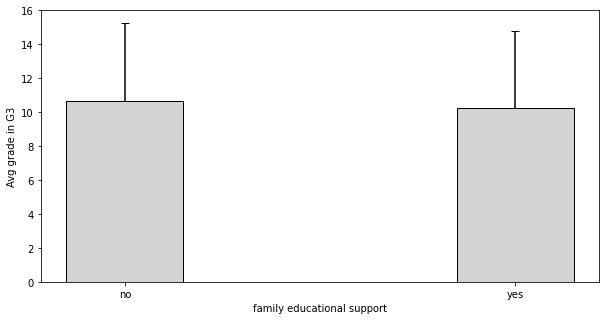

In [75]:
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='family educational support',tick_label=['no','yes'])

In [76]:
x_values=[0,1]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['paidBinary']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['paidBinary']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

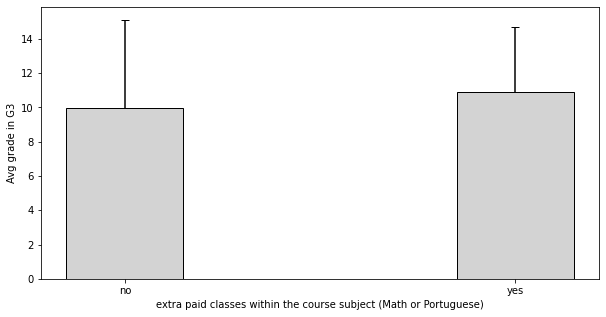

In [77]:
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='extra paid classes within the course subject (Math or Portuguese)',tick_label=['no','yes'])

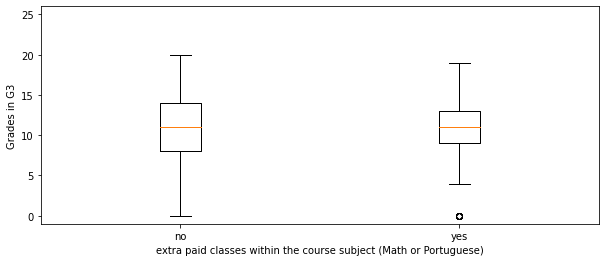

In [82]:
figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,4));
figure.subplots_adjust(wspace = 0.3)

datenPaid0 = daten[daten['paidBinary']==0]
datenPaid1 = daten[daten['paidBinary']==1]

showBox([datenPaid0.G3, datenPaid1.G3],['no','yes'],'Grades in G3',axes,True,x_label='extra paid classes within the course subject (Math or Portuguese)')

In [83]:
x_values=[0,1]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['higherBinary']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['higherBinary']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

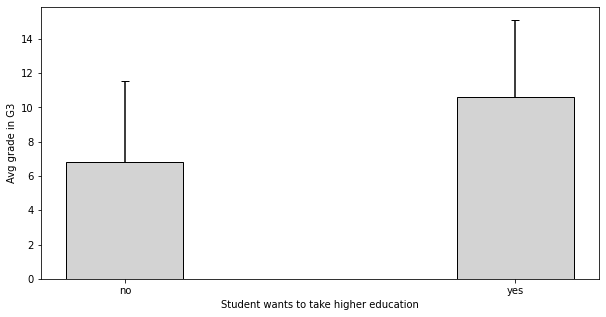

In [84]:
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='Student wants to take higher education',tick_label=['no','yes'])

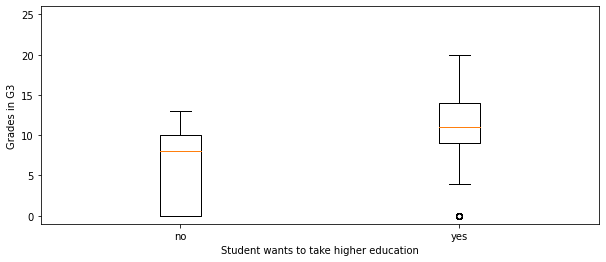

In [85]:
figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,4));
figure.subplots_adjust(wspace = 0.3)

datenHigher0 = daten[daten['higherBinary']==0]
datenHigher1 = daten[daten['higherBinary']==1]

showBox([datenHigher0.G3, datenHigher1.G3],['no','yes'],'Grades in G3',axes,True,x_label='Student wants to take higher education')

In [86]:
x_values=[0,1]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['internetBinary']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['internetBinary']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)

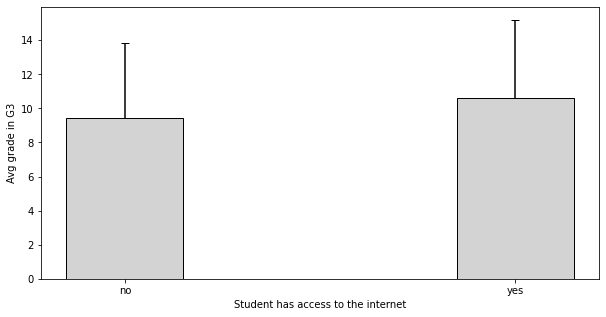

In [87]:
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='Student has access to the internet',tick_label=['no','yes'])

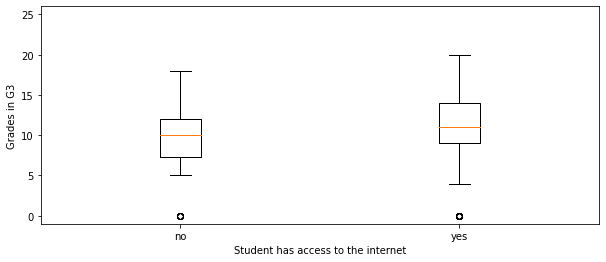

In [91]:
figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,4));
figure.subplots_adjust(wspace = 0.3)

datenInternet0 = daten[daten['internetBinary']==0]
datenInternet1 = daten[daten['internetBinary']==1]

showBox([datenInternet0.G3, datenInternet1.G3],['no','yes'],'Grades in G3',axes,True,x_label='Student has access to the internet')

In [90]:
daten.internetBinary.value_counts()

1    329
0     66
Name: internetBinary, dtype: int64

In [125]:
obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T

In [126]:
obs

array([[16, 32],
       [18, 24],
       [16, 16],
       [14, 28],
       [12, 20],
       [12, 24]])

In [128]:
import scipy.stats as stats

In [130]:
stats.chisquare(obs)

Power_divergenceResult(statistic=array([2.        , 6.66666667]), pvalue=array([0.84914504, 0.24663415]))

In [133]:
chi_test1 = pd.crosstab(daten['G3'], daten["freetime"]) 
stats.chi2_contingency(chi_test1)

(63.34439270783508,
 0.6372694409871891,
 68,
 array([[ 1.8278481 ,  6.15696203, 15.10379747, 11.06329114,  3.84810127],
        [ 0.04810127,  0.16202532,  0.39746835,  0.29113924,  0.10126582],
        [ 0.33670886,  1.13417722,  2.78227848,  2.03797468,  0.70886076],
        [ 0.72151899,  2.43037975,  5.96202532,  4.36708861,  1.51898734],
        [ 0.43291139,  1.45822785,  3.57721519,  2.62025316,  0.91139241],
        [ 1.53924051,  5.18481013, 12.71898734,  9.3164557 ,  3.24050633],
        [ 1.34683544,  4.53670886, 11.12911392,  8.15189873,  2.83544304],
        [ 2.69367089,  9.07341772, 22.25822785, 16.30379747,  5.67088608],
        [ 2.26075949,  7.61518987, 18.68101266, 13.6835443 ,  4.75949367],
        [ 1.49113924,  5.02278481, 12.32151899,  9.02531646,  3.13924051],
        [ 1.49113924,  5.02278481, 12.32151899,  9.02531646,  3.13924051],
        [ 1.29873418,  4.37468354, 10.73164557,  7.86075949,  2.73417722],
        [ 1.58734177,  5.34683544, 13.1164557 ,  9.607

In [27]:
from scipy.stats  import ttest_ind
subset_c=daten[daten.paidBinary==1]
subset_t=daten[daten.paidBinary==0]
for testvar in daten.keys():
    if daten.dtypes[testvar]=="int64": #int64 == interval scaled variable
        tval,pval=ttest_ind(subset_c[testvar],subset_t[testvar])
        print("testvariable:",testvar,"tval=",'{:f}'.format(abs(tval)),"pval=",'{:f}'.format(pval))

testvariable: age tval= 0.712802 pval= 0.476391
testvariable: Medu tval= 3.207098 pval= 0.001451
testvariable: Fedu tval= 1.730900 pval= 0.084255
testvariable: traveltime tval= 1.319644 pval= 0.187722
testvariable: studytime tval= 3.362348 pval= 0.000849
testvariable: failures tval= 3.795432 pval= 0.000171
testvariable: famrel tval= 0.009112 pval= 0.992734
testvariable: freetime tval= 1.276401 pval= 0.202568
testvariable: goout tval= 0.208032 pval= 0.835311
testvariable: Dalc tval= 1.240751 pval= 0.215438
testvariable: Walc tval= 1.200643 pval= 0.230613
testvariable: health tval= 1.553664 pval= 0.121069
testvariable: absences tval= 0.147401 pval= 0.882891
testvariable: G1 tval= 0.775310 pval= 0.438623
testvariable: G2 tval= 2.097114 pval= 0.036622
testvariable: G3 tval= 2.032597 pval= 0.042765
testvariable: sexBinary tval= 2.581427 pval= 0.010201
testvariable: addressBinary tval= 1.048175 pval= 0.295202
testvariable: famsizeBinary tval= 0.275230 pval= 0.783284
testvariable: PstatusBina

In [37]:
from scipy.stats import *
def chisquare(frame,varnamey,varnamex):
    contingencyTable=pd.crosstab(frame[varnamey],frame[varnamex])
    chi2,pval,dof,expectedFreq=chi2_contingency(contingencyTable)
    print("\n\ntestvar:",varnamey,"chi2=",chi2,"pval=",'{:f}'.format(pval),"dof=",dof)#show pval in non-scienetific expression
    return contingencyTable

In [38]:
chisquare(daten,'Medu','paidBinary')



testvar: Medu chi2= 13.82758230167654 pval= 0.007866 dof= 4


paidBinary,0,1
Medu,,
0,2,1
1,41,18
2,56,47
3,59,40
4,56,75
